In [8]:
import pandas as pd 
import numpy as np 
import tweepy 
import requests
import re 
import json 
import matplotlib.pyplot as plt
import datetime 
import os 
import ast 

import seaborn as sns 
from scipy import stats
import warnings
warnings.filterwarnings ('ignore')
%matplotlib inline



# Gather Data

In [9]:
df = pd.read_csv('twitter-archive-enhanced.csv')
#df.info()

folder_name = 'twitter archive'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
print(response)

with open(os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file :
    file.write(response.content)
    
os.listdir(folder_name)

<Response [200]>


['image-predictions.tsv']

In [10]:
image_prdiction_df= pd.read_csv('twitter archive/image-predictions.tsv', sep='\t')


In [11]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

NameError: name 'df_1' is not defined

In [12]:
import json

tweet_list=[]

with open ('tweet-json.txt','r') as file :
    for line in file :
        line_1=file.readline()[:-1]
        #print (type(line_1))
        res = json.loads(line_1) 
        id_t = (res['id'])
        favorite_count = (res['favorite_count'])
        retweet_count = (res['retweet_count'])
        tweet_list.append({'id':id_t,
                           'favorite_count':favorite_count,
                           'retweet_count':retweet_count})

df_tw= pd.DataFrame(tweet_list, columns =
                ['tweet_id','favorite_count','retweet_count']) 



# Assess Data 

In [14]:
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [15]:
df_clean['tweet_id'].duplicated().sum()

0

In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
df_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
df_clean['name'].value_counts()

None          745
a              55
Charlie        12
Lucy           11
Cooper         11
Oliver         11
Penny          10
Tucker         10
Lola           10
Bo              9
Winston         9
Sadie           8
the             8
an              7
Bailey          7
Toby            7
Daisy           7
Buddy           7
Rusty           6
Koda            6
Jack            6
Bella           6
Milo            6
Oscar           6
Jax             6
Dave            6
Scout           6
Leo             6
Stanley         6
very            5
             ... 
Tango           1
Bowie           1
Bodie           1
Ralphy          1
Andy            1
officially      1
Hermione        1
Spark           1
Moofasa         1
Longfellow      1
Murphy          1
Tug             1
Alejandro       1
Herb            1
Grey            1
Terrenth        1
Eugene          1
Mac             1
Aubie           1
Ambrose         1
Marlee          1
Bradlay         1
Chuq            1
Tommy           1
Kramer    

In [19]:
df_clean['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [20]:
df_clean['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [21]:
image_prdiction_df_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [22]:
image_prdiction_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
image_prdiction_df_clean.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
image_prdiction_df_clean[image_prdiction_df['jpg_url'].isnull()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [25]:
image_prdiction_df_clean['jpg_url'].duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2045    False
2046    False
2047    False
2048    False
2049    False
2050    False
2051    False
2052    False
2053    False
2054    False
2055     True
2056    False
2057    False
2058    False
2059    False
2060    False
2061    False
2062    False
2063    False
2064    False
2065    False
2066    False
2067    False
2068    False
2069    False
2070    False
2071    False
2072    False
2073    False
2074    False
Name: jpg_url, Length: 2075, dtype: bool

In [26]:
df_tweet_arch

,tweet_id,favorite_count,retweet_count
0,NaN,33819,6514
1,NaN,42908,8964
2,NaN,20562,3261
3,NaN,56848,16716
4,NaN,32467,7711
5,NaN,28268,5156
6,NaN,27672,4735
7,NaN,25652,5637
8,NaN,26080,4559
9,NaN,22201,3653


# Clean

## Define
### Quality Issues :
#### twitter-archive-enhanced.csv file 
1- change "time stamp" column : type object to datetime type 
2- change tweet id, in_reply_to_status_id from type int to string 
3- Drop columns ('in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp' )
4-change dog "name" : none, a  , an ,the to NAN
5-Expanded URL null values .

#### image-predictions.tsv
6- Remove jpg url Duplication 
7- Change type of rating_numerator ,rating_denominator  from int64 to float .
8-extract the decimal ratings
9-change columns name in image prediction table .

#### tweeter_Json 
10-change 'tweet_id' datatype from int64 to object in tweeter archive table 
#### twitter-archive-enhanced.csv file 
11 - handle missing values in 'Dog_bread' column


  ### Tiddenes Issues : 
#### twitter-archive-enhanced.csv file 
1-dog type columns assigns to one column 'Dog_bread
#### image-predictions.tsv
2-Reshaping the dataframe for image prediction table .
3- merging three dataframes in two dataframe (df_tweet_arch, df_clean)





# Copy for data

In [ ]:
#Copies of the original pieces before cleaning

df_clean = df.copy()
image_prdiction_df_clean = image_prdiction_df.copy()
df_tweet_arch = df_tw.copy()


# Code 

In [27]:
#1-change "time stamp" column : type object to datetime type 
df_clean['timestamp'] = pd.to_datetime(df['timestamp'])


In [28]:
#2-The ID fields, like tweet_id, in_reply_to_status_id should be objects, not integers or floats
#change tweet id from type int to string 
df_clean['tweet_id'] = df_clean['tweet_id'].astype(str)
df_clean['in_reply_to_status_id'] = df_clean['in_reply_to_status_id'].astype(str)
df_clean['in_reply_to_user_id'] = df_clean['in_reply_to_user_id'].astype(str)

In [29]:
#3- Drop columns ('in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp' )
df_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'])


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [30]:
#4-change dog "name" : none, a  , an ,the to NAN
df_clean['name'].value_counts()


None          745
a              55
Charlie        12
Lucy           11
Cooper         11
Oliver         11
Penny          10
Tucker         10
Lola           10
Bo              9
Winston         9
Sadie           8
the             8
an              7
Bailey          7
Toby            7
Daisy           7
Buddy           7
Rusty           6
Koda            6
Jack            6
Bella           6
Milo            6
Oscar           6
Jax             6
Dave            6
Scout           6
Leo             6
Stanley         6
very            5
             ... 
Tango           1
Bowie           1
Bodie           1
Ralphy          1
Andy            1
officially      1
Hermione        1
Spark           1
Moofasa         1
Longfellow      1
Murphy          1
Tug             1
Alejandro       1
Herb            1
Grey            1
Terrenth        1
Eugene          1
Mac             1
Aubie           1
Ambrose         1
Marlee          1
Bradlay         1
Chuq            1
Tommy           1
Kramer    

In [31]:
#4-change dog "name" : none, a  , an ,the to NAN
df_clean.loc[df_clean['name'] == df_clean['name'].str.lower(), 'name'] = np.nan
df_clean['name'].value_counts()

None         745
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Tucker        10
Penny         10
Lola          10
Bo             9
Winston        9
Sadie          8
Bailey         7
Toby           7
Buddy          7
Daisy          7
Bella          6
Rusty          6
Scout          6
Stanley        6
Leo            6
Dave           6
Jax            6
Jack           6
Milo           6
Koda           6
Oscar          6
Larry          5
Louis          5
Oakley         5
Sunny          5
            ... 
O              1
Godzilla       1
Mya            1
William        1
Mack           1
Sojourner      1
Billl          1
Meera          1
Lance          1
Carter         1
Jay            1
Sailor         1
Liam           1
Theo           1
Lambeau        1
Willow         1
Cupid          1
Anna           1
Gustav         1
Pupcasso       1
Amélie         1
Sparky         1
Pancake        1
Joey           1
Mimosa         1
Arya           1
Donny          1
Staniel       

In [32]:
#replace all None values in column 'name' to NaN
df_clean['name'] = df_clean['name'] .str.replace('None', 'NaN')

df_clean['name'].value_counts()

NaN         745
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Tucker       10
Lola         10
Penny        10
Bo            9
Winston       9
Sadie         8
Toby          7
Daisy         7
Buddy         7
Bailey        7
Dave          6
Rusty         6
Bella         6
Jax           6
Oscar         6
Scout         6
Koda          6
Milo          6
Stanley       6
Leo           6
Jack          6
Alfie         5
Gus           5
Louis         5
Chester       5
           ... 
Mimosa        1
Arya          1
Donny         1
Staniel       1
Dook          1
Carter        1
Freddery      1
Suki          1
Dale          1
Ralpher       1
Brownie       1
Monster       1
Jessifer      1
Mason         1
Livvie        1
Cedrick       1
Bode          1
Shiloh        1
Derby         1
Shikha        1
Juckson       1
Mary          1
Blipson       1
Tonks         1
Pete          1
Howie         1
Eriq          1
Jennifur      1
Julius        1
Stark         1
Name: name, Length: 932,

In [33]:
#5-Null values in 'expanded_urls' column
df_clean['expanded_urls'].isna().sum()

59

In [34]:
df_clean['expanded_urls'].fillna("", inplace = True) 


In [35]:
df_clean['expanded_urls'].isna().sum()

0

In [36]:
#6-Remove jpg url Duplication 
image_prdiction_df_clean['jpg_url'].duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2045    False
2046    False
2047    False
2048    False
2049    False
2050    False
2051    False
2052    False
2053    False
2054    False
2055     True
2056    False
2057    False
2058    False
2059    False
2060    False
2061    False
2062    False
2063    False
2064    False
2065    False
2066    False
2067    False
2068    False
2069    False
2070    False
2071    False
2072    False
2073    False
2074    False
Name: jpg_url, Length: 2075, dtype: bool

In [37]:
image_prdiction_df_clean.jpg_url.drop_duplicates()


0         https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg
1         https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg
2         https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
3         https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg
4         https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg
5         https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg
6         https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg
7         https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg
8         https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg
9         https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg
10        https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg
11        https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg
12        https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg
13        https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg
14        https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg
15        https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg
16        https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg
17        http

In [38]:
#7-Change type of rating_numerator ,rating_denominator  from int64 to float .
df_clean['rating_numerator'] = df_clean['rating_numerator'].astype(float)
df_clean['rating_denominator'] = df_clean['rating_denominator'].astype(float)


In [ ]:
#8-extract the decimal ratings
df_clean[df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


In [39]:
#9-change columns name in image prediction table .
cols = ['tweet_id', 'jpg_url', 'img_num', 
     'prediction_1', 'confidence_1', 'breed_1',
     'prediction_2', 'confidence_2', 'breed_2',
     'prediction_3', 'confidence_3', 'breed_3']
image_prdiction_df_clean.columns = cols


In [40]:
image_prdiction_df_clean.head()

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [41]:
#10-change 'tweet_id' datatype from int64 to object in tweeter_Json table 
df_tweet_arch['tweet_id'] = df_tweet_arch['tweet_id'].astype(str)

In [42]:
df_tweet_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 3 columns):
tweet_id          1177 non-null object
favorite_count    1177 non-null int64
retweet_count     1177 non-null int64
dtypes: int64(2), object(1)
memory usage: 27.7+ KB


# Cleaning Tiddenss

In [57]:
#1-dog type columns assigns to one column 'Dog_bread'


df_clean['doggo'].replace('None', '', inplace=True)
df_clean['floofer'].replace('None', '', inplace=True)
df_clean['pupper'].replace('None', '', inplace=True)
df_clean['puppo'].replace('None', '', inplace=True)
df_clean['Dog_bread'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo

df_clean.loc[df_clean.Dog_bread == 'doggopupper', 'Dog_bread'] = 'doggo-pupper'
df_clean.loc[df_clean.Dog_bread == 'doggofloofer', 'Dog_bread'] = 'doggo-floofer'
df_clean.loc[df_clean.Dog_bread == 'doggopuppo', 'Dog_bread'] = 'doggo-puppo'

df_clean.Dog_bread.value_counts()
##pd.melt(df, id_vars=['tweet_id','timestamp','source','text',,'expanded_urls','rating_numerator','rating_denominator','name'], value_vars=['doggo','floofer','pupper','puppo'],var_name='Dog_stage')


                 1976
pupper            245
doggo              83
puppo              29
doggo-pupper       12
floofer             9
doggo-floofer       1
doggo-puppo         1
Name: Dog_bread, dtype: int64

In [58]:
# 11- handle missing values in 'Dog_bread' column
df_clean.loc[df_clean.Dog_bread == '', 'Dog_bread'] = np.nan


In [59]:
#drop 'doggo','floofer','pupper','puppo' Coulmns
df_clean.drop(columns=['doggo','floofer','pupper','puppo'], inplace=True)


In [60]:
#2-Reshaping the dataframe for image prediction table .
test = pd.wide_to_long(image_prdiction_df_clean, stubnames=['prediction', 'confidence', 'breed'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()



In [61]:
#3-merging three dataframes in two dataframe (df_tweet_arch, df_clean)

merged_data= pd.merge(df_clean,df_tweet_arch, on='tweet_id', how='left')

In [62]:
merged_data.describe()

,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,favorite_count,retweet_count
count,1.810000e+02,1.810000e+02,2356.000000,2356.000000,0.0,0.0
mean,7.720400e+17,1.241698e+16,13.126486,10.455433,NaN,NaN
std,6.236928e+16,9.599254e+16,45.876648,6.745237,NaN,NaN
min,6.661041e+17,7.832140e+05,0.000000,0.000000,NaN,NaN
25%,7.186315e+17,4.196984e+09,10.000000,10.000000,NaN,NaN
50%,7.804657e+17,4.196984e+09,11.000000,10.000000,NaN,NaN
75%,8.203146e+17,4.196984e+09,12.000000,10.000000,NaN,NaN
max,8.874740e+17,7.874618e+17,1776.000000,170.000000,NaN,NaN


In [64]:
merged_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,Dog_bread,favorite_count,retweet_count
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,NaN
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,NaN,NaN
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,NaN,NaN
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,NaN,NaN
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,NaN,NaN


In [66]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2356 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2247 non-null object
Dog_bread                     380 non-null object
favorite_count                0 non-null float64
retweet_count                 0 non-null float64
dtypes: datetime64[ns](1), float64(6), object(9)
memory usage: 312.9+ KB


In [65]:
merged_data['name'].value_counts()

NaN         745
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Tucker       10
Lola         10
Penny        10
Bo            9
Winston       9
Sadie         8
Toby          7
Daisy         7
Buddy         7
Bailey        7
Dave          6
Rusty         6
Bella         6
Jax           6
Oscar         6
Scout         6
Koda          6
Milo          6
Stanley       6
Leo           6
Jack          6
Alfie         5
Gus           5
Louis         5
Chester       5
           ... 
Mimosa        1
Arya          1
Donny         1
Staniel       1
Dook          1
Carter        1
Freddery      1
Suki          1
Dale          1
Ralpher       1
Brownie       1
Monster       1
Jessifer      1
Mason         1
Livvie        1
Cedrick       1
Bode          1
Shiloh        1
Derby         1
Shikha        1
Juckson       1
Mary          1
Blipson       1
Tonks         1
Pete          1
Howie         1
Eriq          1
Jennifur      1
Julius        1
Stark         1
Name: name, Length: 932,

# Store Data

In [48]:
merged_data.to_csv('twitter_archive_master.csv')

# Analyze and visualize 

In [49]:
df_clean['Dog_bread'].value_counts()

pupper           245
doggo             83
puppo             29
doggo-pupper      12
floofer            9
doggo-floofer      1
doggo-puppo        1
Name: Dog_bread, dtype: int64

<Container object of 7 artists>

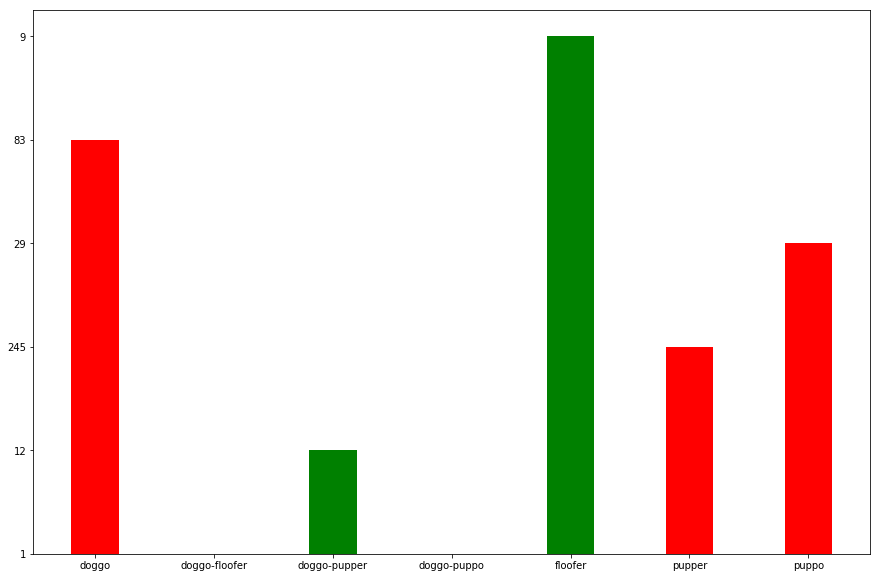

In [50]:
Dog_type=['pupper','doggo-pupper','doggo','doggo-puppo','puppo','floofer','doggo-floofer']
numbers=['245','12','83','1','29','9','1']
plt.figure(figsize=(15,10))
plt.bar(Dog_type, numbers, tick_label = Dog_type, 
        width = .4, color = ['red', 'green']) 
    

In [51]:
test.prediction_level.value_counts()

3    2075
2    2075
1    2075
Name: prediction_level, dtype: int64

In [52]:
visualize_prediction_level = test.prediction_level.value_counts()

In [53]:
test.confidence.mean()

0.26315368057765204

In [84]:
 pp= test.prediction.value_counts()

In [85]:
ppc = pp[:25]

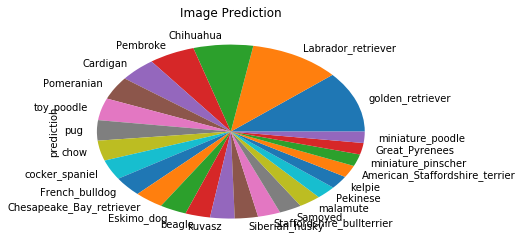

In [86]:
ppc.plot(kind='pie', title='Image Prediction')

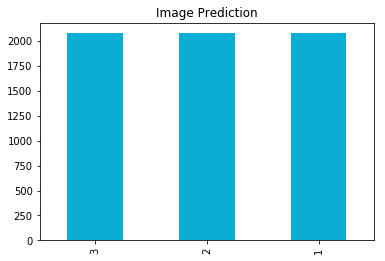

In [87]:
visualize_prediction_level.plot(kind='bar', title='Image Prediction', color='#09aed5')